# Finding Index of Numbers that Add Up to 16 Using Grover's Algorithm

In [1]:
import qiskit

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, IBMQ, QuantumRegister, ClassicalRegister
from qiskit.visualization import *
from numpy import pi
from matplotlib import pyplot as plt
import numpy as np

import math

### Creating Quantum Register with 9 total qubits

---

$V_{i}$ = Index of Number 

$C_{j}$ = Number in Binary

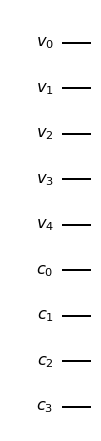

In [2]:
qubits = []

qubits.append(QuantumRegister(5, "v"))
qubits.append(QuantumRegister(4, "c"))

oracle = QuantumCircuit(*qubits)
oracle.draw('mpl')

**Circuit for Arbitrary Counter**

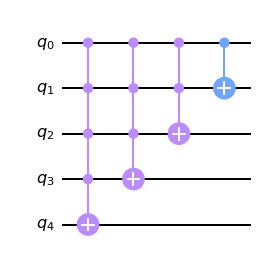

In [3]:
example = QuantumCircuit(5)
li = list(range(4))
for i in range(4):
    example.mct(li, 4 - i)
    li.pop()
example.draw("mpl")

In [4]:
def counter(nqubits):
    qc = QuantumCircuit(nqubits + 1)
    li = list(range(nqubits))
    for i in range(nqubits):
        qc.mct(li, nqubits - i)
        li.pop()
    count = qc.to_gate()
    count.name = "+1"
    return count

For each number $i$ in the list, $i$ numbers of counter will be placed on the wire. An example of the counter is given above.

In [5]:
numbers = [1, 3, 6, 4, 2]
for i, j in enumerate(numbers):
    l = [i]
    l.extend([5, 6, 7, 8])
    for i in range(j):
        oracle.append(counter(4), l)

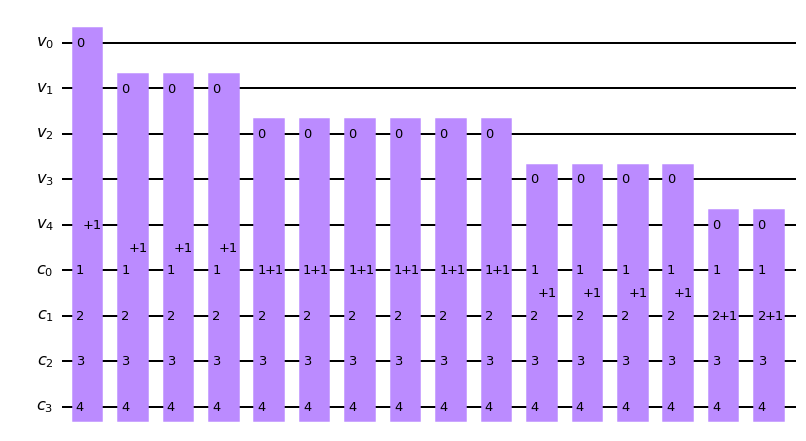

In [6]:
oracle.draw('mpl')

In [7]:
def diffuser(nqubits):
    qc = QuantumCircuit(nqubits)
    
    # Apply transformation |s> -> |00..0> (H-gates)
    for qubit in range(nqubits):
        qc.h(qubit)
        
    # Apply transformation |00..0> -> |11..1> (X-gates)
    for qubit in range(nqubits):
        qc.x(qubit)
    
    # Do multi-controlled-Z gate
    qc.h(nqubits-1)
    qc.mct(list(range(nqubits-1)), nqubits-1)  # multi-controlled-toffoli
    qc.h(nqubits-1)
    
    # Apply transformation |11..1> -> |00..0>
    for qubit in range(nqubits):
        qc.x(qubit)
    
    # Apply transformation |00..0> -> |s>
    for qubit in range(nqubits):
        qc.h(qubit)
    
    # We will return the diffuser as a gate
    U_s = qc.to_gate()
    U_s.name = "D"
    
    return U_s

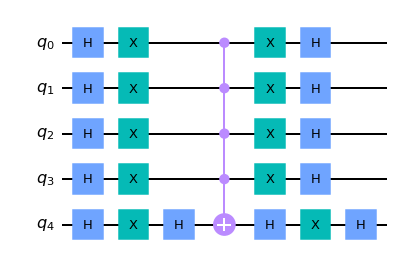

In [8]:
qubits = 5
example = QuantumCircuit(qubits)
    
# Apply transformation |s> -> |00..0> (H-gates)
for qubit in range(qubits):
        example.h(qubit)
        
# Apply transformation |00..0> -> |11..1> (X-gates)
for qubit in range(qubits):
    example.x(qubit)
    
# Do multi-controlled-Z gate
example.h(qubits-1)
example.mct(list(range(qubits-1)), qubits-1)  # multi-controlled-toffoli
example.h(qubits-1)
    
# Apply transformation |11..1> -> |00..0>
for qubit in range(qubits):
    example.x(qubit)
    
# Apply transformation |00..0> -> |s>
for qubit in range(qubits):
    example.h(qubit)

example.draw(output="mpl")

In [9]:
circuit = QuantumCircuit(QuantumRegister(10),ClassicalRegister(5))
circuit.h(range(5))
circuit.x(9)
circuit.h(9)

for i in range(12):
    circuit.append(oracle, list(range(9)))
    circuit.x([5,8])
    circuit.mct([5,6,7,8],9)
    circuit.x([5,8])
    circuit.append(oracle.inverse(), list(range(9)))
    circuit.append(diffuser(5),list(range(5)))

circuit.measure(list(range(5)),list(range(5)))

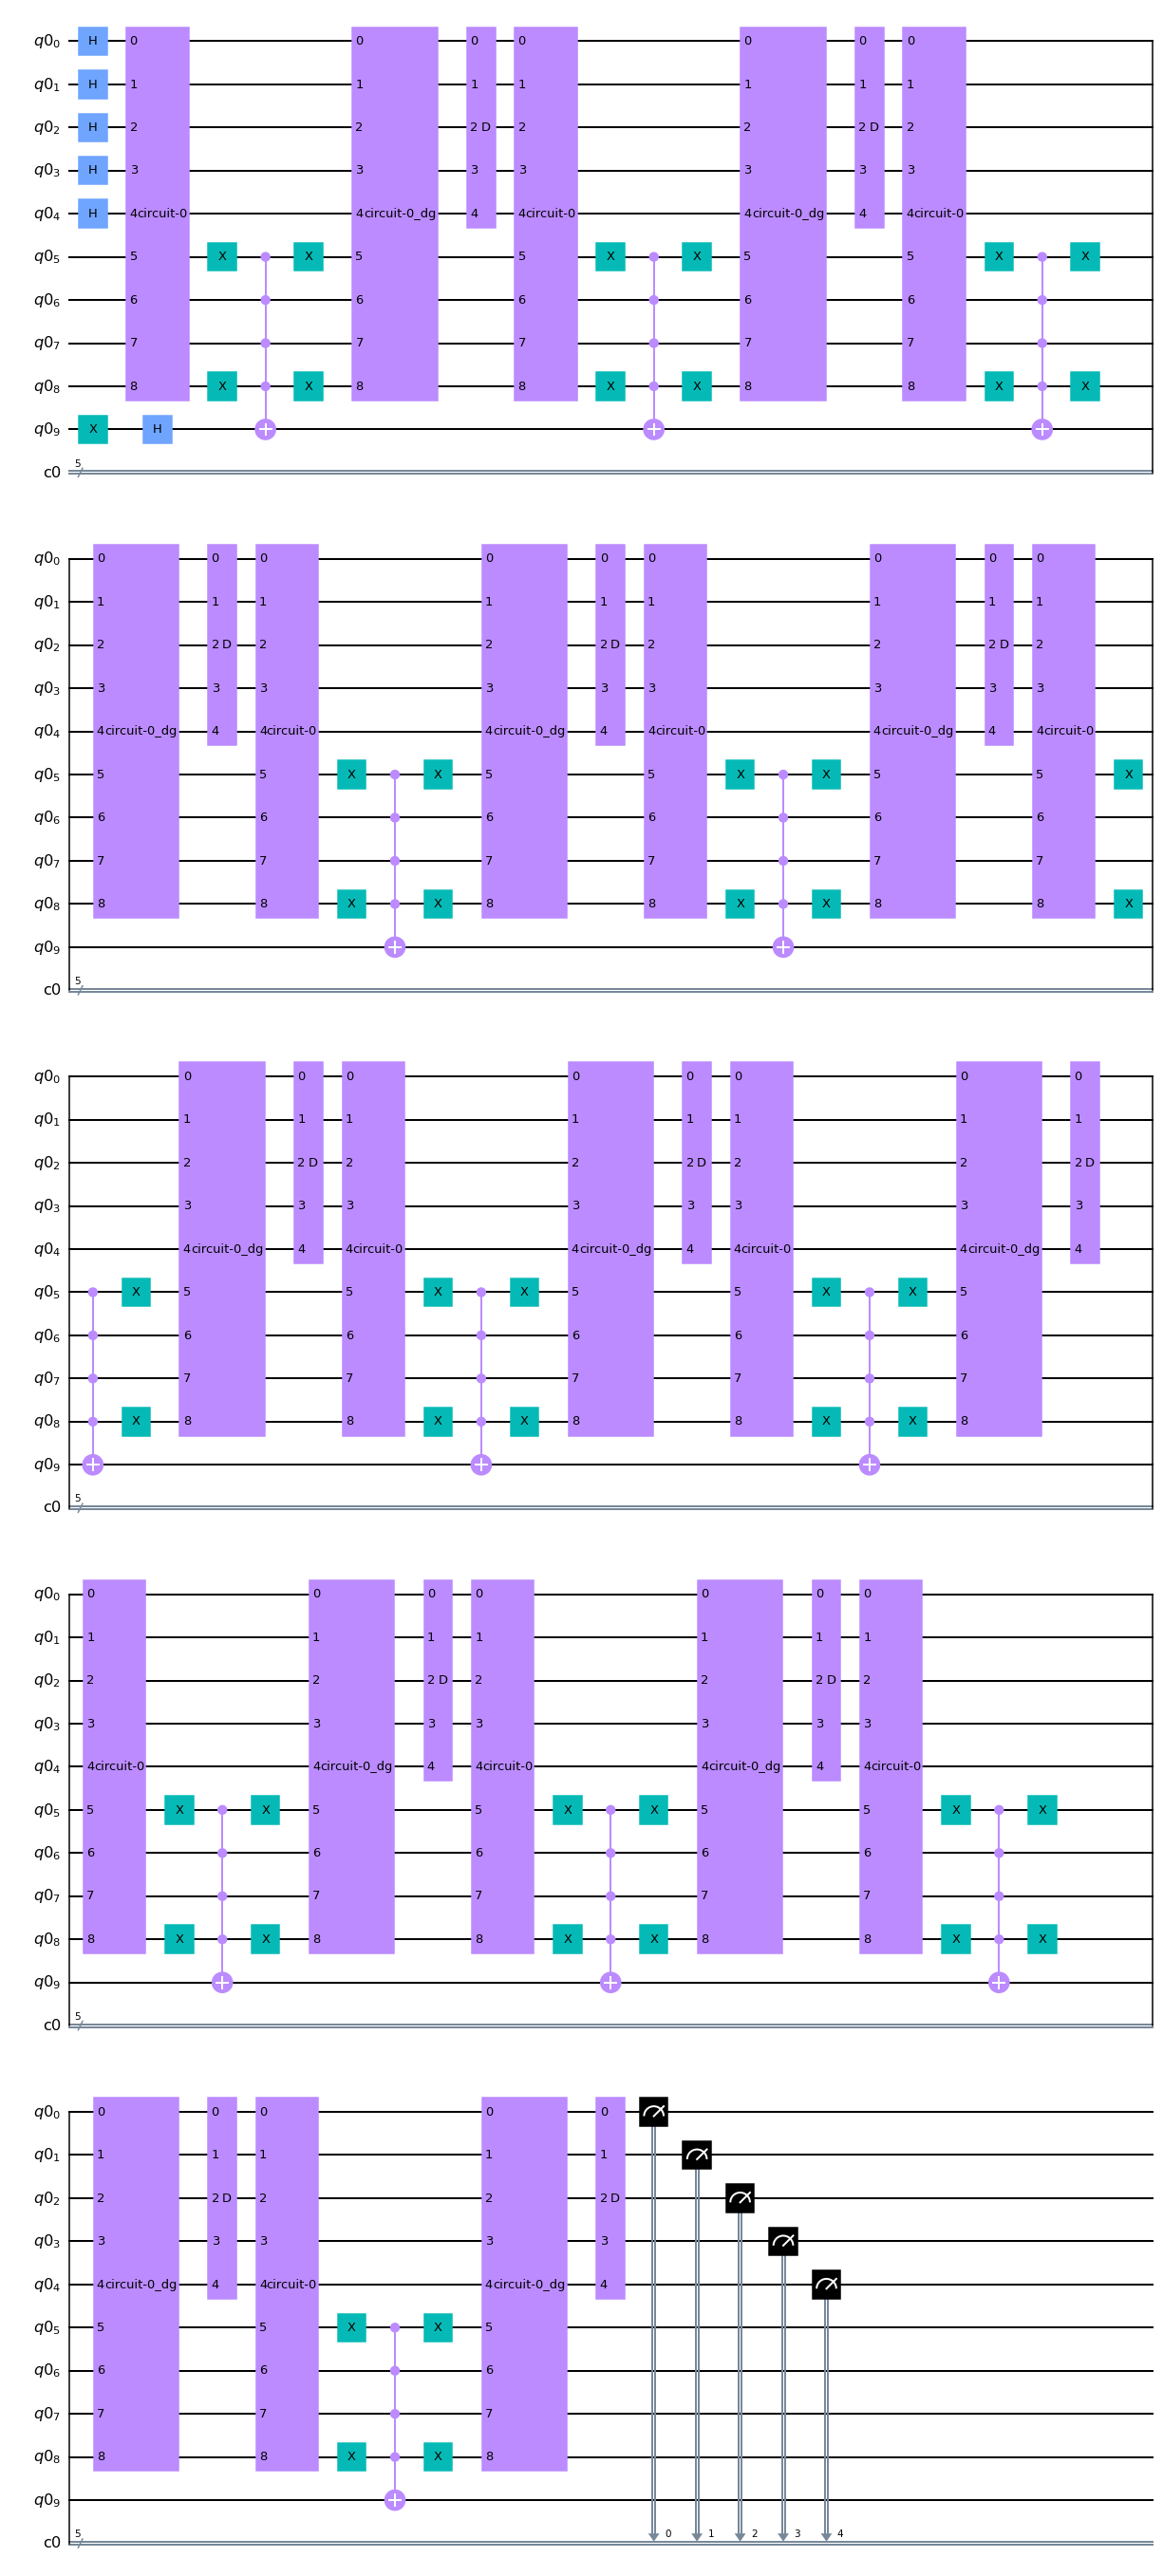

In [10]:
circuit.draw('mpl')

In [11]:
from qiskit import Aer, assemble, transpile
aer_sim = Aer.get_backend('qasm_simulator')
transpiled_grover_circuit = transpile(circuit, aer_sim)
qobj = assemble(transpiled_grover_circuit)
results = aer_sim.run(qobj,shots=100000).result()
counts = results.get_counts()

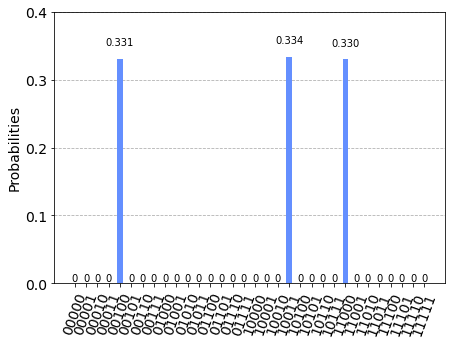

In [12]:
plot_histogram(counts)

Result below.

**IMPORTANT:** 

**The Index Number are left-indexed so the actual solution is the reverse. i.e. "01000" --> "00010"**

In [13]:
counts

{'11110': 20,
 '00100': 33096,
 '00010': 18,
 '10011': 33365,
 '11000': 32984,
 '01100': 21,
 '00011': 15,
 '10111': 17,
 '11010': 15,
 '10001': 24,
 '01001': 20,
 '10010': 21,
 '00001': 26,
 '10000': 17,
 '10101': 19,
 '00110': 25,
 '01101': 11,
 '10100': 19,
 '11111': 17,
 '00000': 19,
 '01000': 21,
 '10110': 17,
 '11011': 23,
 '01111': 17,
 '01110': 20,
 '01010': 23,
 '01011': 15,
 '11101': 18,
 '11100': 16,
 '00101': 24,
 '00111': 19,
 '11001': 18}